In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [5]:
#data['A'].fillna(0,inplace=True)
data.fillna(0,inplace=True)


In [6]:
#data.drop(['A','B','C','D','E','F','Z','Number_of_prev_cond'],axis=1,inplace=True)
data.isnull().sum() 

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [7]:
data.shape

(23097, 18)

In [8]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
data['Patient_Smoker']= label_encoder.fit_transform(data['Patient_Smoker']) 

data['Patient_Smoker'].unique() 

data['Patient_Rural_Urban']= label_encoder.fit_transform(data['Patient_Rural_Urban']) 

data['Patient_Rural_Urban'].unique() 

data['Patient_mental_condition']= label_encoder.fit_transform(data['Patient_mental_condition']) 

data['Patient_mental_condition'].unique() 

#data['Treated_with_drugs']= label_encoder.fit_transform(data['Treated_with_drugs']) 

#data['Treated_with_drugs'].unique() 



array([0])

In [9]:
data1 = pd.get_dummies(data.Treated_with_drugs, prefix='Treated_with_drugs')
data=data.replace(data1)

data = pd.concat([data,data1],axis=1)

# now drop the original 'country' column (you don't need it anymore)
data.drop(['Treated_with_drugs'],axis=1, inplace=True)

In [10]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,22374,8,3333,56,18.479385,2,1,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,2,0,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,48,27.510027,2,0,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,1,1,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,33012,0,12513,128,1.348400,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.drop(['A','B','C','D','E','F','Z','Number_of_prev_cond'],axis=1,inplace=True)

In [12]:
data.isnull().sum() 

ID_Patient_Care_Situation                  0
Diagnosed_Condition                        0
Patient_ID                                 0
Patient_Age                                0
Patient_Body_Mass_Index                    0
Patient_Smoker                             0
Patient_Rural_Urban                        0
Patient_mental_condition                   0
Survived_1_year                            0
Treated_with_drugs_0                       0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5     0
Treated_with_drugs_DX1 DX2 DX3 DX5         0
Treated_with_drugs_DX1 DX2 DX4             0
Treated_with_drugs_DX1 DX2 DX4 DX5         0
Treated_with_drugs_DX1 DX2 DX5             0
Treated_with_drugs_DX1 DX3                 0
Treated_with_drugs_DX1 DX3 DX4             0
Treated_with_drugs_DX1 DX3 DX4 DX5         0
Treated_wi

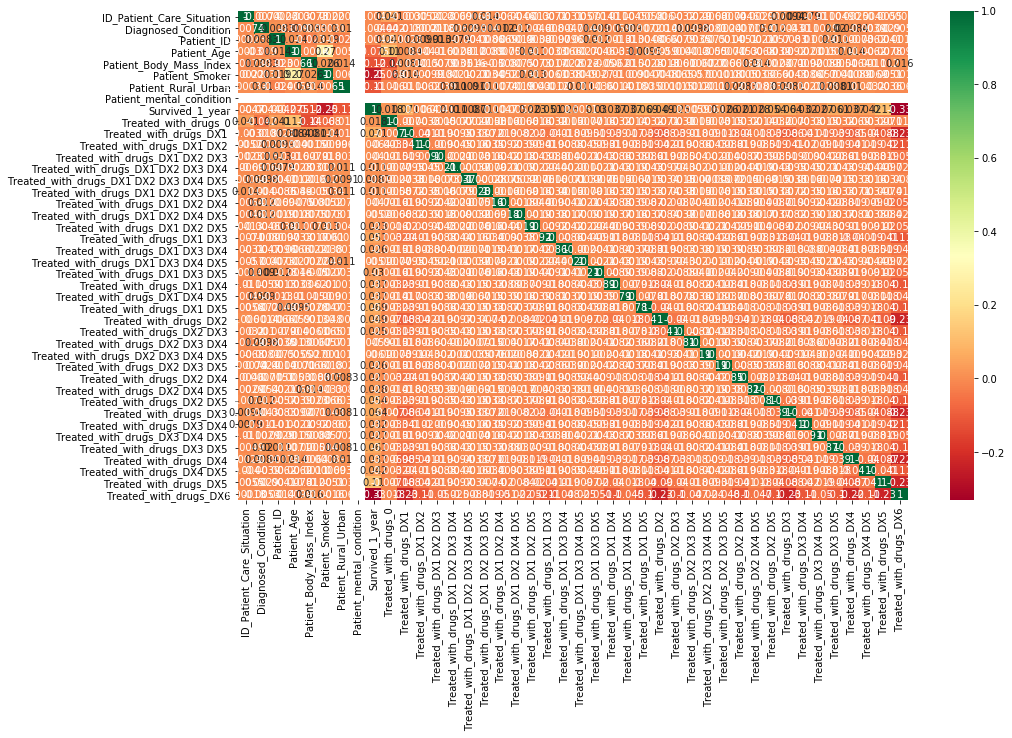

In [13]:
#get correlations of each features in dataset
corrmat = data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [14]:
# Splitting data into Input and Target Variable

y = data[['Survived_1_year']]  # target variable i.e diabetic or not
X = data.drop(['Survived_1_year'], axis=1)  # input variables

In [15]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)

In [16]:

# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
 #Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", f_score)

Baseline Model Accuracy: 0.6851633215269579
Baseline Model F1 Score: 0.7659449970743125


In [18]:

from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

Num Features: 20
Selected Features: [False False False False False  True  True False False False  True  True
  True False False  True False  True  True  True False  True False  True
  True False False False False  True False  True  True False False  True
  True False  True  True  True]
Feature Ranking: [21 19 20 18 10  1  1 22 12 15  1  1  1 14 11  1  7  1  1  1 16  1  6  1
  1  5  8  9  2  1  4  1  1 17 13  1  1  3  1  1  1]


In [19]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
40,Treated_with_drugs_DX6,1
21,Treated_with_drugs_DX1 DX3 DX5,1
39,Treated_with_drugs_DX5,1
19,Treated_with_drugs_DX1 DX3 DX4,1
18,Treated_with_drugs_DX1 DX3,1
17,Treated_with_drugs_DX1 DX2 DX5,1
32,Treated_with_drugs_DX2 DX5,1
15,Treated_with_drugs_DX1 DX2 DX4,1
23,Treated_with_drugs_DX1 DX4 DX5,1
11,Treated_with_drugs_DX1 DX2 DX3,1


In [20]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = clf_lr.fit(X_train_rfe, y_train)

C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.7145480781844418
RFE Model F1 Score: 0.78996138996139


# using boruta

In [22]:

!pip install Boruta

In [23]:

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [24]:

from boruta import BorutaPy

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
 
forest.fit(X_train, y_train)

C:\Users\Shubh\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [25]:
# Apply The Full Featured Classifier To The Test Data
y_pred = forest.predict(X_test)
ac = accuracy_score(y_test, y_pred)
fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.7495736586645677
Baseline Model F1 Score: 0.8280954524988744


In [26]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	27


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	28


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	29


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	29


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	49 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	50 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	51 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	52 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	53 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	54 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	55 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	56 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	57 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	59 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	60 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	61 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	64 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	65 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	66 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	67 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	68 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	69 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	70 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	71 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	73 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	74 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	75 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	76 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	77 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	78 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	79 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	80 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	81 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	82 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	83 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	84 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	85 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	86 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	87 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	88 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	89 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	90 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	91 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	92 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	93 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	94 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	95 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	96 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	97 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	98 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


C:\Users\Shubh\anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	99 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	30


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	10
Tentative: 	0
Rejected: 	30


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=93, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x21BBAF5AAE8,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto'

In [27]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True False  True  True  True  True False False  True False False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False  True  True]
Ranking:  [ 4  1  2  1  1  1  1 31 23  1 15 22 26 30 31 24 28 14  6 18 29 12 10 12
  1  3 18 25 27 21 15 18  7  1 10 18  4  8  9  1  1]
No. of significant features:  10


In [28]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
40,Treated_with_drugs_DX6,1
1,Diagnosed_Condition,1
3,Patient_Age,1
4,Patient_Body_Mass_Index,1
5,Patient_Smoker,1
6,Patient_Rural_Urban,1
33,Treated_with_drugs_DX3,1
9,Treated_with_drugs_DX1,1
24,Treated_with_drugs_DX1 DX5,1
39,Treated_with_drugs_DX5,1


In [29]:

X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [30]:

# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

C:\Users\Shubh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [31]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", rf_imp_ac)
print("Limited Features Boruta Model F1 Score:", rf_imp_fscore)

Limited Features Boruta Model Accuracy: 0.7898465171192444
Limited Features Boruta Model F1 Score: 0.8365639665374414


# using xgboost

In [32]:
!pip install xgboost

C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importances :  [0.01200566 0.03388993 0.01193518 0.02489749 0.03258038 0.12659506
 0.04325146 0.         0.         0.0238848  0.02270005 0.01844474
 0.         0.         0.         0.00930281 0.         0.01484647
 0.01405533 0.01029076 0.         0.00927784 0.01203238 0.01158128
 0.0277319  0.01501172 0.01868811 0.00801849 0.00463352 0.01655405
 0.01443646 0.011432   0.0152252  0.02261019 0.0157647  0.00870079
 0.02438619 0.02369354 0.01255887 0.03142605 0.29755667]


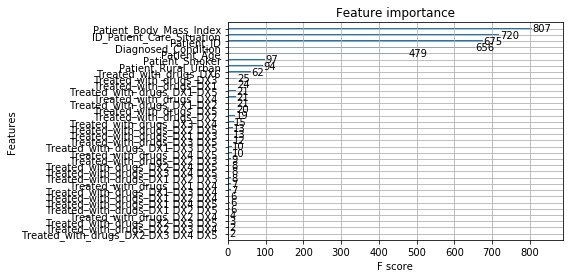

In [46]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [47]:
selection = SelectFromModel(xgb_model)
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)

C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:

y_pred = xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)
xgb_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("XGB Baseline Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.8020464384100747
XGB Baseline Model F1 Score: 0.8460675303478526


In [49]:
# Evaluating the model
predictions = selection_model.predict(select_X_test)      # predict for selected features of X_test
xgb_accuracy = accuracy_score(y_test, predictions)        # Calculating accuracy score on test data
xgb_fscore = f1_score(y_test , predictions)               # Calculating F1 score on test data


# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb_accuracy)
print("Limited Features XGBoost Model F1 Score:", xgb_fscore)

Limited Features XGBoost Model Accuracy: 0.7949626131444313
Limited Features XGBoost Model F1 Score: 0.8415610745058287


In [50]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [51]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [53]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
test_new['Patient_Smoker']= label_encoder.fit_transform(test_new['Patient_Smoker']) 

test_new['Patient_Smoker'].unique() 

test_new['Patient_Rural_Urban']= label_encoder.fit_transform(test_new['Patient_Rural_Urban']) 

test_new['Patient_Rural_Urban'].unique() 

test_new['Patient_mental_condition']= label_encoder.fit_transform(test_new['Patient_mental_condition']) 

test_new['Patient_mental_condition'].unique() 

#data['Treated_with_drugs']= label_encoder.fit_transform(data['Treated_with_drugs']) 

#data['Treated_with_drugs'].unique() 


array([0])

In [54]:
data2 = pd.get_dummies(test_new.Treated_with_drugs, prefix='Treated_with_drugs')
test_new=test_new.replace(data1)

test_new= pd.concat([test_new,data2],axis=1)

# now drop the original 'country' column (you don't need it anymore)
test_new.drop(['Treated_with_drugs'],axis=1, inplace=True)

In [55]:
test_new.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D',
       'E', 'F', 'Z', 'Number_of_prev_cond', 'Treated_with_drugs_DX1 ',
       'Treated_with_drugs_DX1 DX2 ', 'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 

In [56]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,19150,40,3709,16,29.443894,0,0,0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,23216,52,986,24,26.836321,0,1,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,0,0,0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7149,32,3292,42,27.171155,0,1,0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,0,0,0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
test_new.isnull().sum()

ID_Patient_Care_Situation                  0
Diagnosed_Condition                        0
Patient_ID                                 0
Patient_Age                                0
Patient_Body_Mass_Index                    0
Patient_Smoker                             0
Patient_Rural_Urban                        0
Patient_mental_condition                   0
A                                          0
B                                          0
C                                          0
D                                          0
E                                          0
F                                          0
Z                                          0
Number_of_prev_cond                        0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5     0
Treated_with_drugs_DX1 DX2 DX3 DX5         0
Treated_wi

In [59]:
X_important_predict_test = boruta_selector.transform(np.array(test_new))

In [ ]:
X_important_predict_test.shape

In [ ]:
Survived_1_year= selection_model.predict(X_important_predict_test)

In [ ]:
Survived_1_year

In [ ]:
res = pd.DataFrame(Survived_1_year)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("patient1.csv")  